In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import glob

In [2]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', \
                 parse_dates=True)

In [3]:
df = df[df['Country/Region'] == 'Canada']

In [4]:
df = df[df['Province/State'] != 'Diamond Princess']
df = df[df['Province/State'] != 'Grand Princess']

In [5]:
df = df.groupby('Province/State').sum()

In [6]:
df

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Alberta,53.9333,-116.5765,0,0,0,0,0,0,0,0,...,0,1,2,4,7,7,19,19,29,29
British Columbia,49.2827,-123.1207,0,0,0,0,0,0,1,1,...,13,21,21,27,32,32,39,46,64,64
Manitoba,53.7609,-98.8139,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4
New Brunswick,46.5653,-66.4619,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
Ontario,51.2538,-85.3232,0,0,0,0,1,1,1,1,...,22,25,28,29,34,36,41,42,74,79
Quebec,52.9399,-73.5491,0,0,0,0,0,0,0,0,...,2,2,3,4,4,4,8,9,17,17
Saskatchewan,52.9399,-106.4509,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [7]:
df = df.T
df = df.drop('Lat')
df = df.drop('Long')

In [8]:
df.columns

Index(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Ontario',
       'Quebec', 'Saskatchewan'],
      dtype='object', name='Province/State')

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df.index.name = 'Date'

In [11]:
today = df.iloc[-1]

In [12]:
condition = today[(today >= 10)].index

In [13]:
print(condition)

Index(['Alberta', 'British Columbia', 'Ontario', 'Quebec'], dtype='object', name='Province/State')


In [14]:
min_case_num = 10
title_name = "Canada"

In [15]:
data = {}
data_original = {}

for s in condition:
    state = df[s]
    state0 = state[state > min_case_num]
    
    state0 = state0.reset_index()
    state0 = state0[s]
    
    data[s] = state0
    data_original[s] = df[s]

Text(0.5, 0, 'Days after passing 10 confirmed cases')

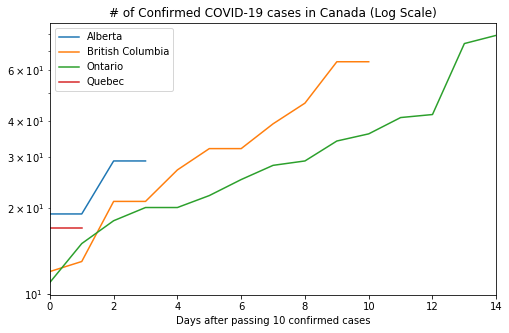

In [16]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data[s].plot(logy=True)

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Log Scale)")
axes.set_xlabel("Days after passing "+str(min_case_num)+" confirmed cases")

Text(0.5, 0, 'Days after passing 10 confirmed cases')

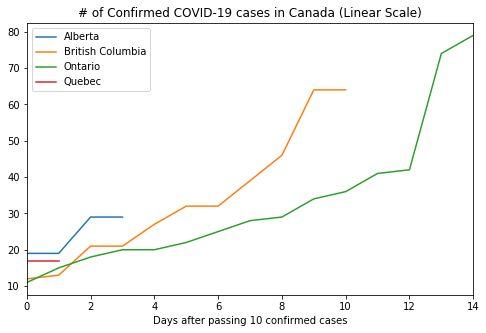

In [17]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data[s].plot()

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Linear Scale)")
axes.set_xlabel("Days after passing "+str(min_case_num)+" confirmed cases")

Text(0.5, 0, 'Dates')

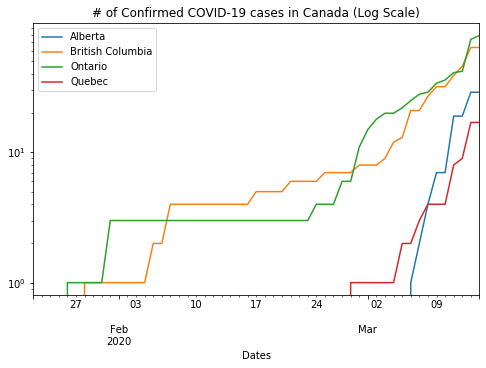

In [18]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data_original[s].plot(logy=True)

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Log Scale)")
axes.set_xlabel("Dates")

Text(0.5, 0, 'Dates')

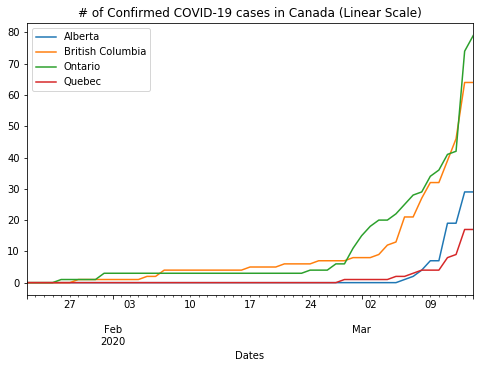

In [19]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data_original[s].plot()

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Linear Scale)")
axes.set_xlabel("Dates")

In [20]:
today.sum()

196.0